In [ ]:
# Install required libraries
!pip install facenet-pytorch Pillow torch torchvision opencv-python-headless google-colab


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 821.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.

In [ ]:
!pip install torch torchvision torchaudio --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 8.9.2.26
    Uninstalling nvidia-cudnn-cu12-8.9.2.26:
      Successfully uninstalled nvidia-cudnn-cu12-8.9.2.26
  Attempting uninstall: torch
    Found existing in

In [ ]:
# List of required libraries
libraries = [
    "torch",
    "torchvision",
    "torchaudio",
    "facenet_pytorch",
    "PIL",  # Pillow is imported as PIL
    "cv2",  # OpenCV
    "ultralytics"
]

# Check if each library is installed
for lib in libraries:
    try:
        __import__(lib)
        print(f"{lib} is installed.")
    except ImportError:
        print(f"{lib} is NOT installed.")


torch is installed.
torchvision is installed.
torchaudio is installed.
facenet_pytorch is installed.
PIL is installed.
cv2 is installed.
ultralytics is NOT installed.


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 14.0 MB/s eta 0:00:00


In [ ]:
import torch
from facenet_pytorch import MTCNN
from PIL import Image, ImageFilter, ImageDraw
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Initialize MTCNN for face detection
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=True, device=device)

# Load YOLO model for object detection (to detect sensitive content like license plates)
model = YOLO('yolov8n.pt')  # You can use any other YOLO model if preferred


100%|██████████| 6.25M/6.25M [00:00<00:00, 20.8MB/s]


In [ ]:
def process_image(image_path):
    # Load the image
    img = Image.open(image_path)
    img_draw = img.copy()

    # Detect faces using MTCNN
    boxes, _ = mtcnn.detect(img)

    # Blur faces
    if boxes is not None:
        for box in boxes:
            box = [int(b) for b in box]
            face_region = img.crop(box)
            blurred_face = face_region.filter(ImageFilter.GaussianBlur(radius=15))
            img.paste(blurred_face, box)

    # Convert PIL image to OpenCV format for YOLO object detection
    opencv_img = np.array(img)[:, :, ::-1].copy()

    # Detect objects using YOLO (e.g., license plates)
    results = model(opencv_img)

    # Blur sensitive content detected by YOLO (e.g., license plates)
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            content_region = opencv_img[y1:y2, x1:x2]
            blurred_content = cv2.GaussianBlur(content_region, (35, 35), 0)
            opencv_img[y1:y2, x1:x2] = blurred_content

    # Convert back to PIL format to display final result
    final_img = Image.fromarray(opencv_img[:, :, ::-1])

    # Display the final image
    plt.figure(figsize=(10, 10))
    plt.imshow(final_img)
    plt.axis('off')
    plt.show()


In [ ]:
def process_video(video_path, output_path):
    # Open video
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to PIL format for MTCNN face detection
        pil_frame = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Detect faces using MTCNN
        boxes, _ = mtcnn.detect(pil_frame)

        # Blur faces
        if boxes is not None:
            for box in boxes:
                box = [int(b) for b in box]
                face_region = pil_frame.crop(box)
                blurred_face = face_region.filter(ImageFilter.GaussianBlur(radius=15))
                pil_frame.paste(blurred_face, box)

        # Convert back to OpenCV format for YOLO object detection
        frame = np.array(pil_frame)[:, :, ::-1]

        # Detect objects using YOLO (e.g., license plates)
        results = model(frame)

        # Blur sensitive content detected by YOLO
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                content_region = frame[y1:y2, x1:x2]
                blurred_content = cv2.GaussianBlur(content_region, (35, 35), 0)
                frame[y1:y2, x1:x2] = blurred_content

        # Write the processed frame to output video
        out.write(frame)

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()


In [ ]:
from google.colab import files
from PIL import Image
import cv2

def process_image(image_path):
    # Your image processing code goes here
    img = Image.open(image_path)
    img.show()
    # ... Add face detection, blurring, etc.

def process_video(video_path, output_path):
    # Your video processing code goes here
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Example processing: just displaying the video (you can add detection and blurring here)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imshow('Video', frame)

    cap.release()
    cv2.destroyAllWindows()
    # Save the processed video to output_path
    # ... Add video processing code to save output

def main():
    choice = input("Do you want to process an image or video? (Enter 'image' or 'video'): ").strip().lower()

    if choice == 'image':
        # Upload image file
        uploaded = files.upload()
        image_path = list(uploaded.keys())[0]
        process_image(image_path)

    elif choice == 'video':
        # Upload video file
        uploaded = files.upload()
        video_path = list(uploaded.keys())[0]
        output_path = input("Enter the output video path (e.g., output.mp4): ").strip()
        process_video(video_path, output_path)

    else:
        print("Invalid input! Please enter 'image' or 'video'.")

# Run the main function
if __name__ == '__main__':
    main()


Do you want to process an image or video? (Enter 'image' or 'video'): image


Saving WhatsApp Image 2024-08-22 at 09.37.31_7df4d093.jpg to WhatsApp Image 2024-08-22 at 09.37.31_7df4d093.jpg


Saving WhatsApp Image 2024-08-22 at 09.37.31_7df4d093.jpg to WhatsApp Image 2024-08-22 at 09.37.31_7df4d093 (4).jpg


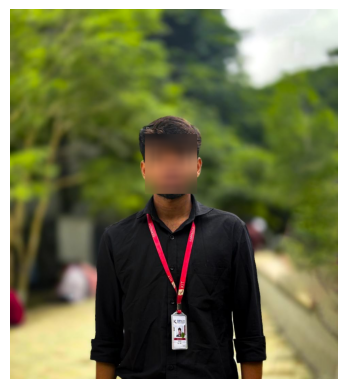

In [ ]:
from google.colab import files
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

# Upload the image
uploaded = files.upload()

# Get the uploaded image path
image_path = list(uploaded.keys())[0]

# Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True)

def process_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert the image to RGB if it has an alpha channel
    if img.mode == 'RGBA':
        img = img.convert('RGB')  # Convert RGBA to RGB

    # Convert image to OpenCV format (BGR)
    img_cv = np.array(img)[:, :, ::-1].copy()

    # Detect faces using MTCNN
    boxes, _ = mtcnn.detect(img)

    if boxes is not None:
        # Loop over each detected face
        for box in boxes:
            x1, y1, x2, y2 = [int(b) for b in box]  # Convert to integer coordinates

            # Extract the face region
            face_region = img_cv[y1:y2, x1:x2]

            # Apply Gaussian blur to the face region
            blurred_face = cv2.GaussianBlur(face_region, (55, 55), 30)  # Increasing blur

            # Replace the original face region with the blurred one
            img_cv[y1:y2, x1:x2] = blurred_face

    # Convert back to RGB format for displaying
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # Display the processed image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Process the uploaded image
process_image(image_path)

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np

# Load the YOLOv8 model (you can also specify the weights path if needed)
model = YOLO('yolov8n.pt')  # You can use 'yolov8n-face.pt' for more face-specific detection if available.

def process_video_with_yolo(video_path, output_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the video frame width, height, and frames per second (fps)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create a VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Exit the loop if no frame is captured

        # Perform object detection using YOLOv8
        results = model(frame)

        for result in results:
            # Get bounding boxes for detected objects
            boxes = result.boxes

            for box in boxes:
                # Extract the coordinates and class for each detected box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0]
                cls = int(box.cls[0])

                # Check if the detected class is 'person' or 'face' (adjust as per your model)
                if cls == 0:  # Class '0' typically corresponds to 'person' in YOLO models
                    # Extract the region of the frame corresponding to the detected object
                    detected_region = frame[y1:y2, x1:x2]

                    # Apply Gaussian blur to the detected region
                    blurred_region = cv2.GaussianBlur(detected_region, (55, 55), 30)

                    # Replace the original region with the blurred one
                    frame[y1:y2, x1:x2] = blurred_region

        # Write the processed frame to the output video
        out.write(frame)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    print(f"Processed video saved at: {output_path}")

    # Download the video after processing (Optional)
    from google.colab import files
    files.download(output_path)

# Usage example
video_path = '/content/WhatsApp Video 2024-10-13 at 14.17.34_bfd31d0b.mp4'
output_video_path = '/content/processed_yolo_output.mp4'
process_video_with_yolo(video_path, output_video_path)



0: 640x384 1 person, 195.8ms
Speed: 14.2ms preprocess, 195.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 164.9ms
Speed: 5.3ms preprocess, 164.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 171.9ms
Speed: 5.6ms preprocess, 171.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 163.3ms
Speed: 3.9ms preprocess, 163.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 175.7ms
Speed: 3.8ms preprocess, 175.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 baseball glove, 143.7ms
Speed: 4.2ms preprocess, 143.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 baseball glove, 158.2ms
Speed: 3.4ms preprocess, 158.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 baseball glove, 161.0ms
Speed: 4.1ms prepro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ultralytics

import cv2
from ultralytics import YOLO
import numpy as np

# Download the YOLOv8 face-specific model
!yolo model download yolov8n-face.pt  # Download the face-specific model


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 757, in entrypoint
    raise SyntaxError(
SyntaxError: 'model' is a valid YOLO argument but is missing an '=' sign to set its value, i.e. try 'model=None'

    Arguments received: ['yolo', 'model', 'download', 'yolov8n-face.pt']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'classify', 'detect', 'obb', 'segment'}
                MODE (required) is one of {'val', 'predict', 'track', 'export', 'benchmark', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
    

In [ ]:
def process_video_with_face_blur(video_path, output_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the video frame width, height, and frames per second (fps)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create a VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Exit the loop if no frame is captured

        # Perform face detection using YOLOv8 face-specific model
        results = model(frame)

        for result in results:
            # Get bounding boxes for detected faces
            boxes = result.boxes

            for box in boxes:
                # Extract the coordinates for the detected face
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                # Extract the region of the frame corresponding to the detected face
                face_region = frame[y1:y2, x1:x2]

                # Apply Gaussian blur to the face region
                blurred_face = cv2.GaussianBlur(face_region, (55, 55), 30)

                # Replace the original face region with the blurred one
                frame[y1:y2, x1:x2] = blurred_face

        # Write the processed frame to the output video
        out.write(frame)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    print(f"Processed video saved at: {output_path}")

    # Download the video after processing (Optional)
    from google.colab import files
    files.download(output_path)

# Usage example
video_path = '/content/WhatsApp Video 2024-10-13 at 14.17.34_bfd31d0b.mp4'
output_video_path = '/content/processed_face_blur_output.mp4'
process_video_with_face_blur(video_path, output_video_path)


0: 640x384 1 person, 515.7ms
Speed: 6.1ms preprocess, 515.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 289.4ms
Speed: 17.7ms preprocess, 289.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 370.3ms
Speed: 4.0ms preprocess, 370.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 367.9ms
Speed: 4.2ms preprocess, 367.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 359.3ms
Speed: 3.5ms preprocess, 359.3ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 baseball glove, 408.9ms
Speed: 3.7ms preprocess, 408.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 baseball glove, 308.9ms
Speed: 3.6ms preprocess, 308.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 baseball glove, 459.0ms
Speed: 11.4ms prepr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>